# CSGO Winner Prediction - Group E (GMBD 2020)

#### Predicting whether Counter Strike or Terrorist will be the round winner, using classification models
#### Group members: AMOS M., LI X., PABLO B., SARANG Z., VANIA C.
#### Outline of this notebook:
1. Import libraries and load dataset
2. Exploratory data analysis (EDA)
3. Feature engineering and dimensionality reduction
4. Model selection
5. Cross validation
6. Final model validation and exporting results


#### Reference:
1. Metadata: https://github.com/Skybox-Technologies/csgo-ai-competition/  

---

## 1. Importing libraries & Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import category_encoders as ce
import pprint
pp = pprint.PrettyPrinter(indent=4)
# %load_ext nb_black
pd.set_option("display.max_columns", 1000)
pd.set_option("max_seq_items", 1000)
pd.set_option("display.width", 1000)
np.set_printoptions(threshold=np.inf)

In [2]:
df_entire = pd.read_csv("csgo_round_snapshots.csv")
df = pd.read_csv("modeling_set.csv")
print(
    "There are {} columns and {} rows in the raw dataset".format(
        df_entire.shape[1], df_entire.shape[0]
    )
)
df_entire.head()

There are 97 columns and 122410 rows in the raw dataset


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


---

## 2. EDA

#### Using entire dataset ("csgo_round_snapshots.csv"), from Kaggle

### 2.1 Checking column names, datatypes and quick stats

In [3]:
print(df_entire.columns)

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90',
       'ct_weapon_r8re

In [4]:
print(df_entire.dtypes.unique())

[dtype('float64') dtype('O') dtype('bool')]


*The dataset is organized by `ct_` and `t` columns on the same attribute side-by-side. Without plotting correlation, it's reasonable to suspect that there will be high (negative) correlations between ct and t columns.*

In [5]:
df_entire.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,0.004011,0.001773,0.110138,0.004738,0.0,0.000792,0.011045,0.110301,0.006919,3.310195,0.000008,0.0,0.063818,0.002729,1.076236,0.052733,0.007557,0.107311,0.004403,0.000049,0.001462,0.002753,0.002034,0.001952,0.146998,0.005645,0.0,0.000008,0.000980,0.000106,0.000163,0.000155,0.0,0.000057,0.0,0.000139,0.000719,0.000008,0.239147,0.824941,0.059505,0.020440,0.046426,0.036468,0.007557,0.000261,0.440675,0.380868,0.061751,0.009386,3.179789,0.122400,0.236974,0.291618,0.174046,0.004934,0.008120,0.028323,0.899101,0.438257,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,0.063206,0.042067,0.388980,0.070780,0.0,0.037148,0.112130,0.405933,0.086935,1.625785,0.002858,0.0,0.262884,0.053096,1.219112,0.247009,0.094191,0.41

*There are some skewed data, like `ct_money` and `t_money` columns*

### 2.2 Missing and Constant values

In [6]:
missing = 100 * df_entire.isnull().sum() / df_entire.isnull().count().sort_values(ascending=False)
# pd.DataFrame(missing, columns=['column','perc_missing'])
print(missing)

bomb_planted               0.0
ct_armor                   0.0
ct_defuse_kits             0.0
ct_grenade_decoygrenade    0.0
ct_grenade_flashbang       0.0
                          ... 
t_weapon_tec9              0.0
t_weapon_ump45             0.0
t_weapon_usps              0.0
t_weapon_xm1014            0.0
time_left                  0.0
Length: 97, dtype: float64


*There are no missing values*


In [7]:
constant_col = []
for i in df_entire.columns:
    if len(df_entire[i].unique()) ==1:
        print('{} is a column which only has value {}'.format(i,df_entire[i].unique()))
        constant_col.append(i)

ct_weapon_bizon is a column which only has value [0.]
ct_weapon_g3sg1 is a column which only has value [0.]
t_weapon_m249 is a column which only has value [0.]
ct_weapon_negev is a column which only has value [0.]
ct_weapon_r8revolver is a column which only has value [0.]
ct_weapon_sawedoff is a column which only has value [0.]


*These columns all contain only `0`, which are not informative to the model. Removing them from the dataset when we fit algorithms*


### 2.3 Visualizing attributes distribution and correlations

In [10]:
# Separate variables by data types

numerical_var = [i for i in df_entire.columns if df_entire[i].dtypes == "float64"]
categorical_var = [i for i in df_entire.columns if df_entire[i].dtypes != "float64"]

ValueError: could not convert string to float: 'de_dust2'

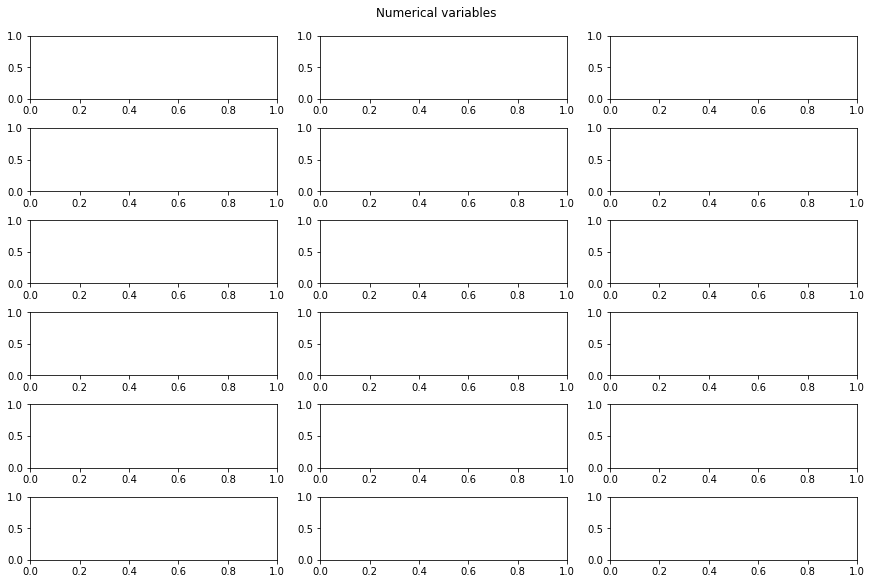

In [11]:
# select some numerical features to plot

to_plot = numerical_var[:17]

num_plots = len(to_plot)
num_cols = 3
num_rows = num_plots // num_cols +1 

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)
fig.suptitle('Numerical variables')

for subplot, feature in enumerate(to_plot):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.kdeplot(
        data=df_entire,
        x=feature,
        palette="icefire",
        alpha=0.5,
        linewidth=0,
        fill=True,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

*Some expected patterns from observing the numerical variables, for example:
when one team has a higher number in money, or apparatus, or players alive, that team tends to win.
CT side tends to win the round faster (more time left)*
    

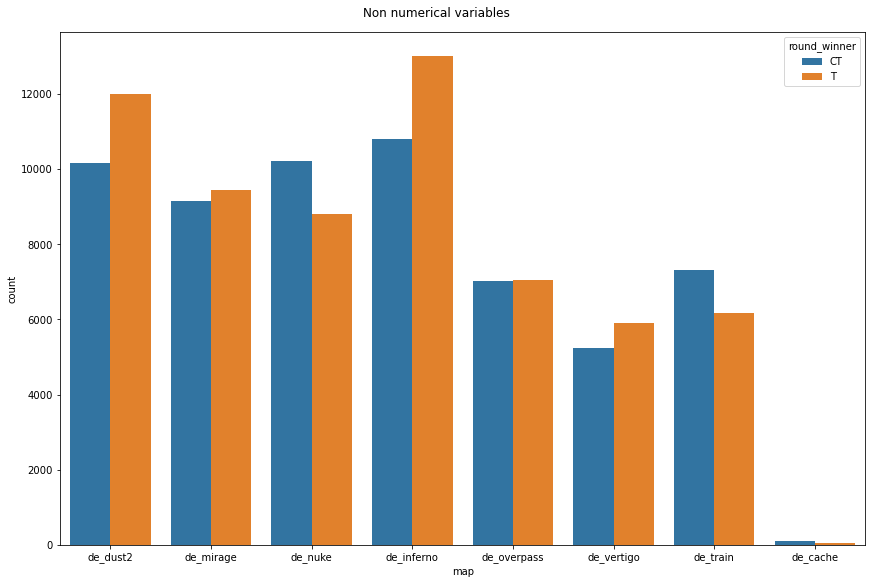

In [311]:
# Bar chart for non-numerical columns

fig, axs = plt.subplots(constrained_layout=True)
fig.set_size_inches(12, 8)
fig.suptitle('Non numerical variables')

sns.countplot(
        data=df_entire,
        x='map',
        hue="round_winner",
#         ax=axs[0][0],
    )

# sns.countplot(
#         data=df_entire,
#         x='bomb_planted',
#         hue="round_winner",
#         ax=axs[0][1],
#     )
plt.show()


* *3 maps are clearly more favorable to T (de_dust2, de_inferno, de_vertigo), 2 maps are favorable to CT (de_nuke, de_train).*
* *bomb_planted is important to T*


### 2.4 Correlation matrix

Separate the `ct_` columns and `t_` columns to study more about correlations:

In [61]:
t = [colname for colname in df_entire.columns if colname.startswith('t_')]
print(t)

['t_score', 't_health', 't_armor', 't_money', 't_helmets', 't_players_alive', 't_weapon_ak47', 't_weapon_aug', 't_weapon_awp', 't_weapon_bizon', 't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas', 't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_glock', 't_weapon_m249', 't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7', 't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 't_weapon_negev', 't_weapon_nova', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 't_weapon_scar20', 't_weapon_sg553', 't_weapon_ssg08', 't_weapon_ump45', 't_weapon_xm1014', 't_weapon_deagle', 't_weapon_fiveseven', 't_weapon_usps', 't_weapon_p250', 't_weapon_p2000', 't_weapon_tec9', 't_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade', 't_grenade_molotovgrenade', 't_grenade_decoygrenade']


*We can largely group the information into 4 main categories:*
*1. General (timeleft, score, health, money, players_alive, map)*
*2. Weapons*
*3. Grenades*
*4. Protective and other equipment (armor, helmets, defuse_kits)*

Look at the correlation within one side attribute:

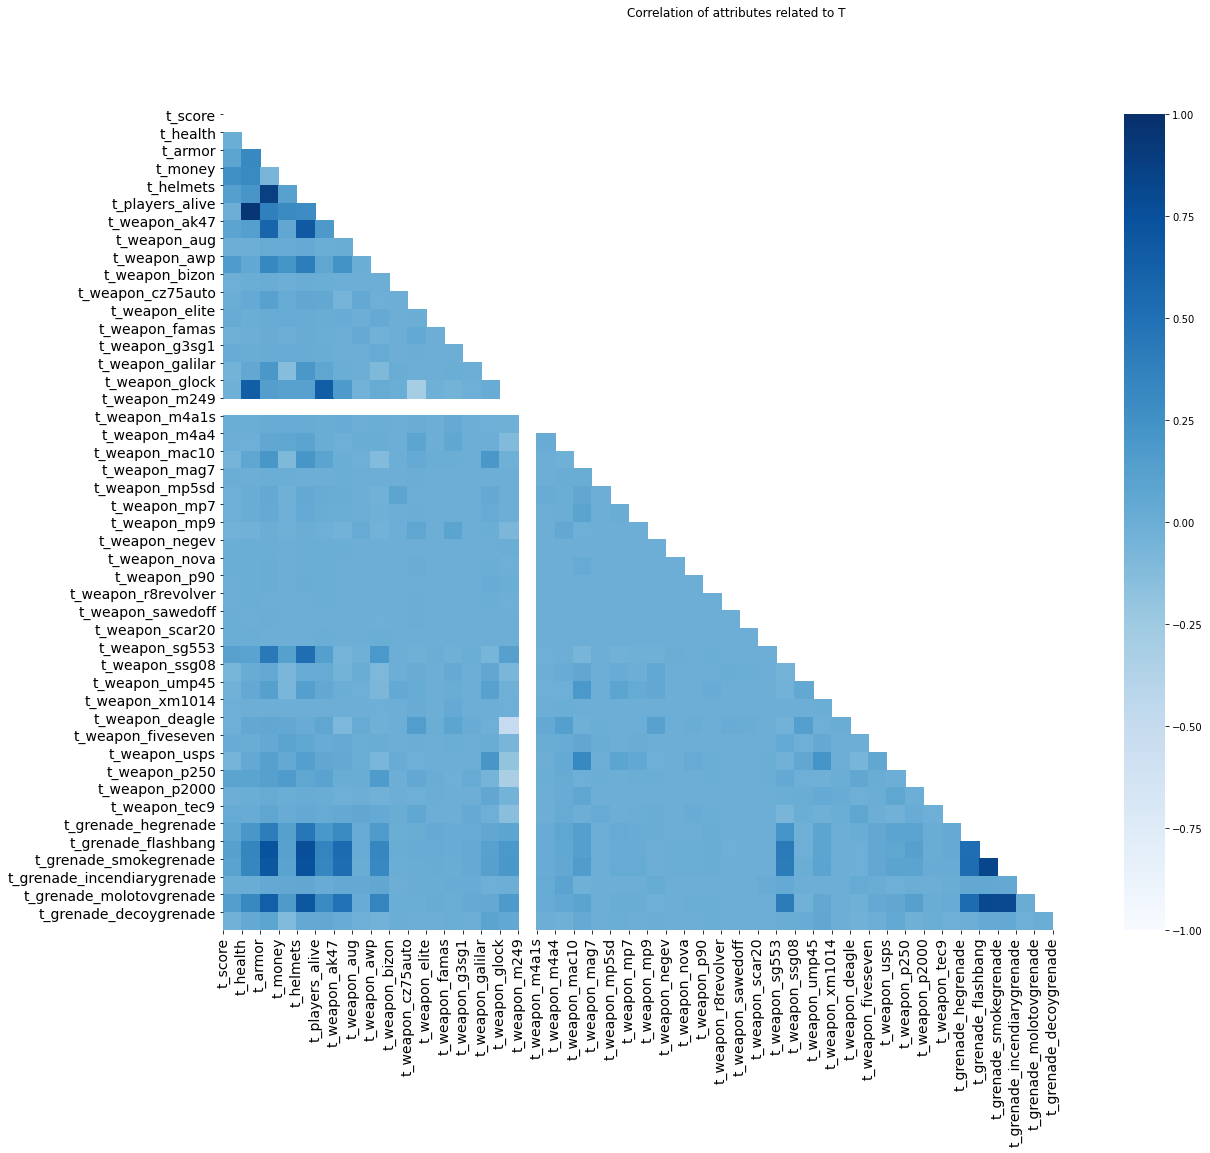

In [65]:
df_corr = df_entire[t].corr()
mask = np.triu(np.ones_like(df_corr))

fig, ax = plt.subplots(figsize = (19,15))
fig.suptitle('Correlation of attributes related to T')
sns.heatmap(df_corr,mask=mask,cmap='Blues',fmt='.2f',vmin=-1,vmax=1)

plt.xticks(range(df_entire[t].shape[1]), df_entire[t].columns, fontsize=14, rotation=90)
plt.yticks(range(df_entire[t].shape[1]), df_entire[t].columns, fontsize=14)
plt.show()

* *Players alive and health highly correlated*
* *Armor and helmets highly correlated*
* *Grenades are relatively highly correlated with armor and helmets*
* *Diferent types of grenades are highly correlated with each other*

`t_money` and `t_players_alive`, `t_health` 

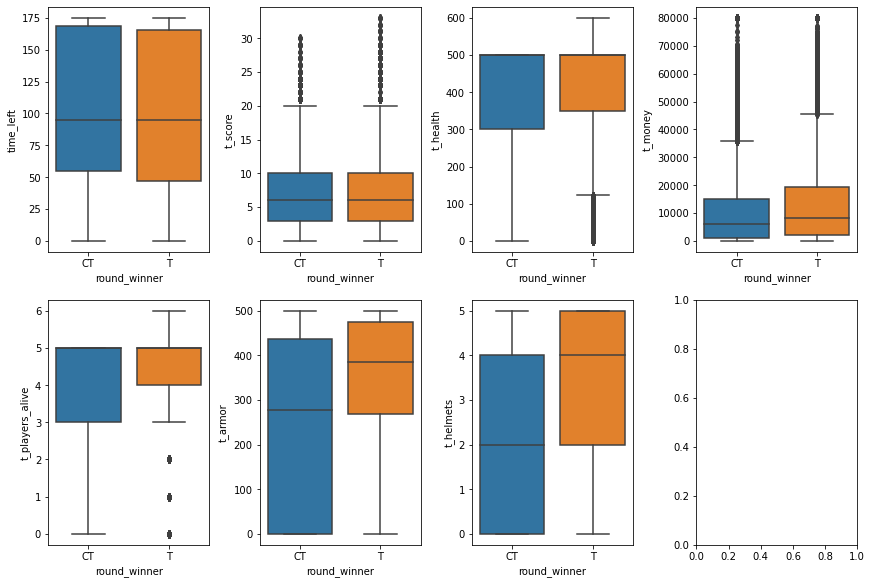

In [66]:
feature_ls = ['time_left','t_score','t_health','t_money','t_players_alive','t_armor','t_helmets']

num_plots = len(feature_ls)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df_entire,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()


Weapon and grenade usage by the two sides

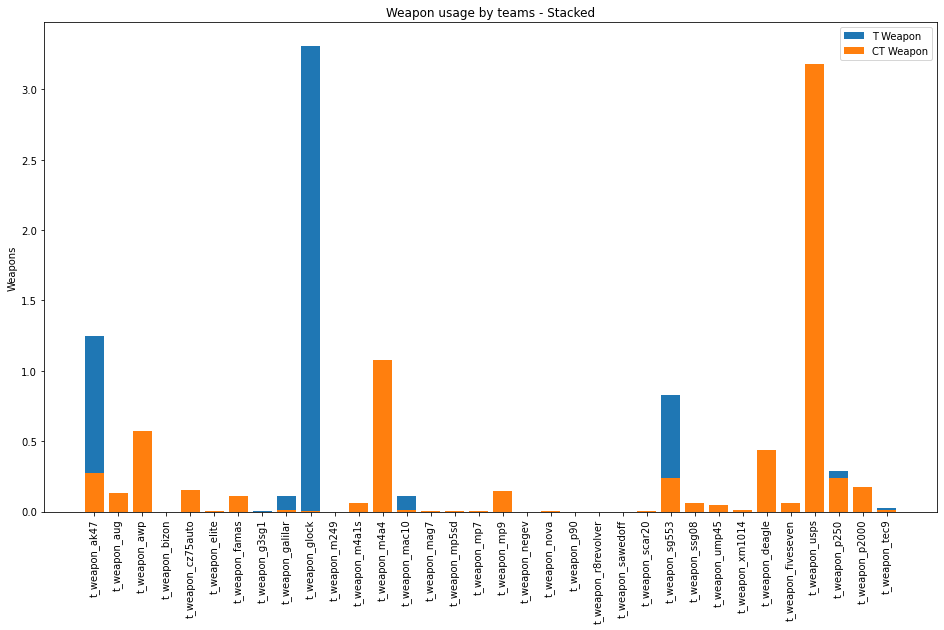

In [73]:
t_weapon = [colname for colname in df_entire.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in df_entire.columns if colname.startswith('ct_weapon')]

fig, ax = plt.subplots(figsize=(16,9))

t_data = df_entire[t_weapon].mean()
ct_data = df_entire[ct_weapon].mean()
x_pos = np.arange(len(t_weapon))

ax.bar( x_pos, t_data, label = 'T Weapon',)
ax.bar( x_pos, ct_data, label = 'CT Weapon',)

ax.set_ylabel('Weapons')
ax.set_title('Weapon usage by teams - Stacked')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(t_weapon)
plt.xticks(x_pos, t_weapon, rotation=90)
ax.legend()


Text(0.5, 1.0, 'Grenades Usage by teams - Stacked')

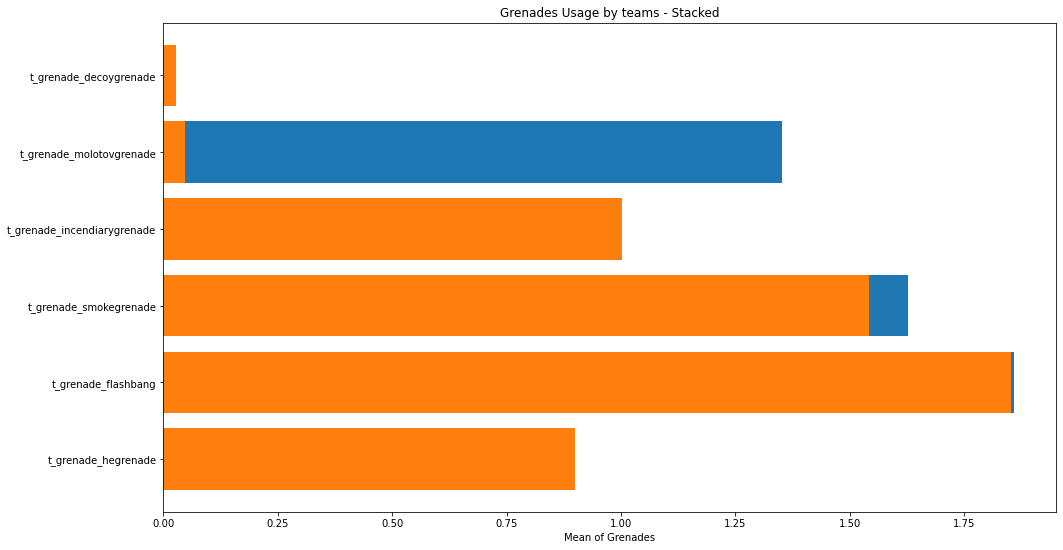

In [300]:
t_grenade = [colname for colname in df_entire.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in df_entire.columns if colname.startswith('ct_grenade')]

fig, ax = plt.subplots(figsize=(16,9))

x = df_entire[t_grenade].mean()
y_pos = np.arange(len(t_grenade))

ax.barh(y_pos, x,align='center',label = 'T Grenades',)
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 

x = df_entire[ct_grenade].mean()
y_pos = np.arange(len(ct_grenade))

ax.barh(y_pos, x,align='center', label = 'CT Grenades')
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 
ax.set_xlabel('Mean of Grenades')
ax.set_title('Grenades Usage by teams - Stacked')


Weapon usage seem quite different between 2 teams - partly due to some weapons are only available to one side;
Grenade usage is not that different, apart from the Molotov grenade

## 3. Feature Engineering and Dimensionality Reduction

Using modeling dataset ("modeling_set.csv")

#### 3.0 Define a function to do scaling, train/test split, fitting and evaluation at once, because we will be running this multiple times

In [13]:
score = []
name = []

In [14]:
def rf_predictor(df,var,model_version, target='round_winner',test_size=0.3,random_state=42):
    """The main function that takes in a dataset, variables and outputs model performance and feature importance"""
    
    # scaling variables
#     scaler = StandardScaler().fit(df[var])
    scaler = RobustScaler().fit(df[var])
    X = scaler.transform(df[var])
    
    # train/test split
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # fit model and make prediction
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # obtain accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    name.append(model_version)

    model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
    print(model_performance)
    print('---------------------------------------')
    
    # top 13 feature importance
    print('Most important features')
    feature_importance = pd.DataFrame({'feature':var,'importance':rf.feature_importances_})
    feature_importance.sort_values(by='importance',inplace=True, ascending = False)
    
    print(feature_importance)
    
    print('---------------------------------------')
#     print('Least important features')
#     print(feature_importance[:-10])
    
    # return the model for later use
    return rf

#### 3.1 Before diving into FE, run a `baseline` model with all numerical features with randomForest

In [15]:
numerical_var = [i for i in df.columns if df[i].dtypes == "float64"]
target = 'round_winner'

rf_predictor(df = df, var=numerical_var, model_version = 'rf baseline all numerical')

                       model  Accuracy
0  rf baseline all numerical  0.846268
---------------------------------------
Most important features
            feature  importance
5          ct_armor    0.072757
6           t_armor    0.072702
8           t_money    0.056115
7          ct_money    0.053608
10        t_helmets    0.051811
..              ...         ...
28  ct_weapon_g3sg1    0.000000
61  t_weapon_scar20    0.000000
50  ct_weapon_negev    0.000000
35    t_weapon_m249    0.000000
51   t_weapon_negev    0.000000

[94 rows x 2 columns]
---------------------------------------


RandomForestClassifier(random_state=1)

#### 3.2 Removing outliers 

Because in the EDA we saw some columns are skewed

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
X, y = df[numerical_var].values, df[target].values
print("Before removing outliers:", X.shape, y.shape)

iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(X)

mask = yhat != -1
X, y = X[mask, :], y[mask]
print("After removing outliers:", X.shape, y.shape)

Before removing outliers: (85687, 94) (85687,)
After removing outliers: (84830, 94) (84830,)


In [18]:
y = pd.DataFrame(y, columns=[target])
X = pd.DataFrame(X, columns=numerical_var)

df_1 = pd.concat((X, y), axis=1)
df_1.shape

(84830, 95)

In [19]:
rf_predictor(df = df_1, var=numerical_var, model_version = 'rf baseline all numerical remove outlier')

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
---------------------------------------
Most important features
               feature  importance
6              t_armor    0.071771
5             ct_armor    0.071098
8              t_money    0.056696
7             ct_money    0.055272
10           t_helmets    0.048993
..                 ...         ...
20     ct_weapon_bizon    0.000000
61     t_weapon_scar20    0.000000
58  ct_weapon_sawedoff    0.000000
34      ct_weapon_m249    0.000000
43       t_weapon_mag7    0.000000

[94 rows x 2 columns]
---------------------------------------


RandomForestClassifier(random_state=1)

*Removing outliers didn't improve the model*

#### 3.2 Feature encoding using Catboost encoder
We have 1 categorical variable, `map` and 1 boolean varaible `bomb_planted`. We'll use catboost encoder to transform `map` into numerical values.

In [20]:
data2 = df.copy()

map_advantage = []
for i in data2['map']:
    if i in ('de_dust2','de_inferno','de_vertigo'):
        map_advantage.append('t')
    
    elif i in ('de_nuke','de_train'):
        map_advantage.append('ct')
    else:
        map_advantage.append('equal')

data2['map_advantage'] = map_advantage

categorical_var = ["map", "bomb_planted",'map_advantage']
target = 'round_winner'

In [22]:
# Create the Catboost encoder, and "fit" + "transform" our data.

# target value has to be numerical in catboost encoder
nu_target = [1 if x == 'CT' else 0 for x in data2[target] ]


# encoding 
catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(data2[categorical_var],nu_target)
new_columns = new_columns.add_suffix('_cb')

In [23]:
data2.drop(['map','bomb_planted','map_advantage'],axis=1,inplace=True)
data2 = pd.concat((data2,new_columns),axis=1)

In [24]:
var = list(set(data2.columns) - set([target]))

rf_predictor(df = data2, var=var, model_version = 'baseline encoded with map')

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
---------------------------------------
Most important features
                feature  importance
4              ct_armor    0.074426
5               t_armor    0.065474
89             ct_money    0.049814
33              t_money    0.049480
68               map_cb    0.043276
..                  ...         ...
35      ct_weapon_negev    0.000000
9       t_weapon_scar20    0.000000
50      ct_weapon_g3sg1    0.000000
77        t_weapon_m249    0.000000
67  t_weapon_r8revolver    0.000000

[97 rows x 2 columns]
---------------------------------------


RandomForestClassifier(random_state=1)

*Adding in encoded variables did improve the model from baseline. Now need to dig deeper into the dataset itself.*

#### 3.3 Removing columns with constant values

In [25]:
data3 = data2.copy()
data3.drop(constant_col,axis=1,inplace=True)
var = list(set(data3.columns) - set([target]))
rf_predictor(df = data3, var=var, model_version = 'Removing constants')

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
---------------------------------------
Most important features
                feature  importance
5               t_armor    0.070151
4              ct_armor    0.067559
33              t_money    0.050134
83             ct_money    0.048574
30            t_helmets    0.046904
..                  ...         ...
14       t_weapon_bizon    0.000002
53       t_weapon_negev    0.000001
9       t_weapon_scar20    0.000000
23        t_weapon_mag7    0.000000
63  t_weapon_r8revolver    0.000000

[91 rows x 2 columns]
---------------------------------------


RandomForestClassifier(random_state=1)

*Removing constant values did improve the model further.*

#### 3.4 PCA

Simple feature reduction won't be enough, since we have 96 variables. Need to try PCA

In [26]:
from sklearn.decomposition import PCA

data4 = data3.copy()

var = list(set(data4.columns) - set([target]))
X = data4[var]

pca = PCA(n_components=12, random_state=42)
features_transormed = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9999999497863677

In [27]:
df_transformed = pd.DataFrame(
    features_transormed, columns=["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']
)

df_transformed = pd.concat((df_transformed,data4[target]),axis=1)
pcs = ["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']

In [28]:
rf_predictor(df = df_transformed, var = pcs, model_version= 'rf PCA')

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
---------------------------------------
Most important features
   feature  importance
3      PC4    0.234320
1      PC2    0.096786
5      PC6    0.092389
4      PC5    0.088327
2      PC3    0.077115
0      PC1    0.067991
10    PC11    0.066787
9     PC10    0.057234
11    PC12    0.057117
8      PC9    0.056017
6      PC7    0.053287
7      PC8    0.052631
---------------------------------------


RandomForestClassifier(random_state=1)

*PCA reduced the accuracy significantly. We will discard it and try construct more features to better represent the underlying problem*

#### 3.5 Manually construct variables from highly correlated features

Constructing variables by combining correlated features, such as `players_alive` with `health` or `armor` with `helmets`

In [29]:
data5 = data3.copy()
t_weapon = [colname for colname in data5.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in data5.columns if colname.startswith('ct_weapon')]
t_grenade = [colname for colname in data5.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in data5.columns if colname.startswith('ct_grenade')]

data5['ct_player_health_index'] = data5['ct_players_alive']*data5['ct_health']
data5['t_player_health_index'] = data5['t_players_alive']*data5['t_health']
data5['ct_player_armor_helmets'] = data5['ct_armor'] + data5['ct_helmets']
data5['t_player_armor_helmets'] = data5['t_armor'] + data5['t_helmets']
data5['ct_total_weapons'] = data5[ct_weapon].agg('sum',axis='columns')
data5['t_total_weapons'] = data5[t_weapon].agg('sum',axis='columns')
data5['ct_total_grenades'] = data5[ct_grenade].agg('sum',axis='columns')
data5['t_total_grenades'] = data5[t_grenade].agg('sum',axis='columns')



In [30]:
var = list(set(data5.columns) - set([target]))
rf_predictor(df = data5, var=var, model_version= 'rf manual construction' )

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
5                    rf manual construction  0.836037
---------------------------------------
Most important features
                    feature    importance
46          t_total_weapons  4.610246e-02
5                   t_armor  4.555491e-02
41  ct_player_armor_helmets  4.532816e-02
17   t_player_armor_helmets  4.518096e-02
4                  ct_armor  4.231815e-02
..                      ...           ...
15           t_weapon_bizon  1.323598e-06
80           ct_weapon_m249  1.092852e-06
70      t_weapon_r8revolver  6.957528e-07
27            t_weapon_mag7  0.000000e+00
10          t_weapon_scar20  0.000000e+00

[99 rows x 2 columns]
-------------------------------

RandomForestClassifier(random_state=1)

*Model accuracy did not improve with the manual construction of variables, which means we still didn't capture a good underlying relatioship o this dataset*

#### 3.6 Transform continuous variables by creating bins

We noticed that there are obvious bumps in the distribution of continuous variables in this dataset, by binning them we might get a better model performance.
1. time_left: binwidth 25
2. t_health and ct_health: bins 100,200,300,400,500
3. t_armor and ct_armor: bins 0, 100,200,300,400,500
4. t_money and ct_money: 0, 10000,20000,30000, > 30000

In [363]:
# Create bins for time_left

# df['time_left'].plot.hist(bins=50)
# df['time_left'].value_counts()

In [31]:
# create bins

data_6 = data3.copy()

time_bucket = []
# t_health_bucket = []
# ct_health_bucket = []
# t_armor_bucket = []
# ct_armor_bucket = []
# t_money_bucket = []
# ct_money_bucket = []

# time_left
for x in data_6['time_left']:
    if x <25:
        time_bucket.append('t25')
    elif x >= 25 and x < 50:
        time_bucket.append('t50')
    elif x >= 50 and x < 75:
        time_bucket.append('t75')
    elif x >= 75 and x < 100:
        time_bucket.append('t100')
    elif x >= 100 and x < 125:
        time_bucket.append('t125')
    elif x >= 125 and x < 150:
        time_bucket.append('t150')
    else:
        time_bucket.append('t175')
        
# health
# for x in data_6['t_health']:
#     if x <= 100:
#         t_health_bucket.append('health100')
#     elif x > 100 and x <= 200:
#         t_health_bucket.append('health200')
#     elif x > 200 and x <= 300:
#         t_health_bucket.append('health300')
#     elif x > 300 and x <= 400:
#         t_health_bucket.append('health400')
#     else:
#         t_health_bucket.append('health500')
        
# for x in data_6['ct_health']:
#     if x <= 100:
#         ct_health_bucket.append('health100')
#     elif x > 100 and x <= 200:
#         ct_health_bucket.append('health200')
#     elif x > 200 and x <= 300:
#         ct_health_bucket.append('health300')
#     elif x > 300 and x <= 400:
#         ct_health_bucket.append('health400')
#     else:
#         ct_health_bucket.append('health500')
        
# armor
# for x in data_6['t_armor']:
#     if x <= 0:
#         t_armor_bucket.append('armor0')
#     elif x >0 and x <= 100:
#         t_armor_bucket.append('armor100')
#     elif x > 100 and x <= 200:
#         t_armor_bucket.append('armor200')
#     elif x > 200 and x <= 300:
#         t_armor_bucket.append('armor300')
#     elif x > 300 and x <= 400:
#         t_armor_bucket.append('armor400')
#     else:
#         t_armor_bucket.append('armor500')

# for x in data_6['ct_armor']:
#     if x <= 0:
#         ct_armor_bucket.append('armor0')
#     elif x >0 and x <= 100:
#         ct_armor_bucket.append('armor100')
#     elif x > 100 and x <= 200:
#         ct_armor_bucket.append('armor200')
#     elif x > 200 and x <= 300:
#         ct_armor_bucket.append('armor300')
#     elif x > 300 and x <= 400:
#         ct_armor_bucket.append('armor400')
#     else:
#         ct_armor_bucket.append('armor500')

#money
# for x in data_6['t_money']:
#     if x <= 10000:
#         t_money_bucket.append('money10')
#     elif x >10000 and x <= 20000:
#         t_money_bucket.append('money20')
#     elif x >20000 and x <= 30000:
#         t_money_bucket.append('money30')
#     elif x >30000 and x <= 40000:
#         t_money_bucket.append('money40')
#     else:
#         t_money_bucket.append('money80')

# for x in data_6['ct_money']:
#     if x <= 10000:
#         ct_money_bucket.append('money10')
#     elif x >10000 and x <= 20000:
#         ct_money_bucket.append('money20')
#     elif x >20000 and x <= 30000:
#         ct_money_bucket.append('money30')
#     elif x >30000 and x <= 40000:
#         ct_money_bucket.append('money40')
#     else:
#         ct_money_bucket.append('money80')


data_6['time_bucket'] = time_bucket
# data_6['t_health_bucket'] = t_health_bucket
# data_6['ct_health_bucket'] = ct_health_bucket
# data_6['t_armor_bucket'] = t_armor_bucket
# data_6['ct_armor_bucket'] = ct_armor_bucket
# data_6['t_money_bucket'] = t_money_bucket
# data_6['ct_money_bucket'] = ct_money_bucket


In [365]:
# data_5.groupby('time_bucket').agg({'time_bucket':'size',
#                                    'ct_score':['mean','min','max'],
#                                    't_score':['mean','min','max'],
#                                    'ct_player_health_index':['mean','min','max'],
#                                    't_player_health_index':['mean','min','max']
                                   
#                                   })

In [32]:
# encoding 

d6_target = [1 if x == 'CT' else 0 for x in data_6[target] ]

catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(data_6[['time_bucket']],d6_target)
new_columns = new_columns.add_suffix('_cb')

data_6_coded = pd.concat((data_6,new_columns),axis=1)

#drop original columns and created columns, leaving only the columns coded in numerical values
data_6_coded.drop(['time_left','time_bucket',],axis=1,inplace=True)


In [33]:
var = list(set(data_6_coded.columns) - set([target]))
rf_predictor(df = data_6_coded, var=var, model_version= 'binned time' )

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
5                    rf manual construction  0.836037
6                               binned time  0.844517
---------------------------------------
Most important features
                feature    importance
4              ct_armor  7.165365e-02
5               t_armor  6.920466e-02
83             ct_money  5.035447e-02
32              t_money  5.025787e-02
29            t_helmets  4.696153e-02
..                  ...           ...
73       ct_weapon_m249  2.319347e-06
52       t_weapon_negev  1.434490e-06
62  t_weapon_r8revolver  1.334256e-06
22        t_weapon_mag7  4.449100e-07
8       t_weapon_scar20  0.000000e+00

[91 rows x 2 columns]
-------------------------

RandomForestClassifier(random_state=1)

Create bins didn't improve the model

#### 3.7 Capture relationships between columns by creating additional columns

1. difference of total weapon
2. difference of total grenade
3. difference of armor
4. difference of helmets
5. difference of players alive
6. difference of scores
7. difference of health
8. difference of money


In [343]:
# data_coded.columns

In [34]:
data7 = data3.copy()

t_weapon = [colname for colname in data7.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in data7.columns if colname.startswith('ct_weapon')]
t_grenade = [colname for colname in data7.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in data7.columns if colname.startswith('ct_grenade')]

# data7['ct_total_weapons'] = data7[ct_weapon].agg('sum',axis='columns')
# data7['t_total_weapons'] = data7[t_weapon].agg('sum',axis='columns')
# data7['ct_total_grenades'] = data7[ct_grenade].agg('sum',axis='columns')
# data7['t_total_grenades'] = data7[t_grenade].agg('sum',axis='columns')
t_weapon_main = ['t_weapon_ak47','t_weapon_glock','t_weapon_sg553']
t_weapon_other = set(t_weapon) - set(t_weapon_main)
ct_weapon_main = ['ct_weapon_ak47','ct_weapon_awp','ct_weapon_m4a4','ct_weapon_sg553','ct_weapon_deagle','ct_weapon_usps','ct_weapon_p250','ct_weapon_p2000']
ct_weapon_other = set(ct_weapon) - set(ct_weapon_main)

t_grenade_main = ['t_grenade_molotovgrenade','t_grenade_smokegrenade','t_grenade_flashbang','t_grenade_hegrenade']
t_grenade_other = set(t_grenade) - set(t_grenade_main)
ct_grenade_main = ['ct_grenade_incendiarygrenade','ct_grenade_hegrenade','ct_grenade_flashbang','ct_grenade_smokegrenade']
ct_grenade_other = set(ct_grenade) - set(ct_grenade_main)

data7['t_main_weapon'] = data7[t_weapon_main].agg('sum',axis='columns')
data7['ct_main_weapon'] = data7[ct_weapon_main].agg('sum',axis='columns')
data7['t_main_grenade'] = data7[t_grenade_main].agg('sum',axis='columns')
data7['ct_main_grenade'] = data7[ct_grenade_main].agg('sum',axis='columns')
data7['ct_weapon_other'] = data7[ct_weapon_other].agg('sum',axis='columns')
data7['t_weapon_other'] = data7[t_weapon_other].agg('sum',axis='columns')
data7['ct_grenade_other'] = data7[ct_grenade_other].agg('sum',axis='columns')
data7['t_grenade_other'] = data7[t_grenade_other].agg('sum',axis='columns')

data7['diff_main_weapon'] = data7['t_main_weapon'] - data7['ct_main_weapon']
data7['diff_other_weapon'] = data7['t_weapon_other'] - data7['ct_weapon_other']
data7['diff_main_grenade'] = data7['t_main_grenade'] - data7['ct_main_grenade']
data7['diff_other_weapon'] = data7['t_grenade_other'] - data7['ct_grenade_other']

data7['diff_armor'] = data7['t_armor'] - data7['ct_armor']
data7['diff_helmet'] = data7['t_helmets'] - data7['ct_helmets']
data7['diff_players'] = data7['t_players_alive'] - data7['ct_players_alive']
data7['diff_score'] = data7['t_score'] - data7['ct_score']
data7['diff_health'] = data7['t_health'] - data7['ct_health']
data7['diff_money'] = data7['t_money'] - data7['ct_money']


In [402]:
# data7.head()

In [35]:
# main weapon & grenade categories
t_weapon_main = ['t_weapon_ak47','t_weapon_glock','t_weapon_sg553']
t_weapon_other = set(t_weapon) - set(t_weapon_main)
ct_weapon_main = ['ct_weapon_ak47','ct_weapon_awp','ct_weapon_m4a4','ct_weapon_sg553','ct_weapon_deagle','ct_weapon_usps','ct_weapon_p250','ct_weapon_p2000']
ct_weapon_other = set(ct_weapon) - set(ct_weapon_main)

t_grenade_main = ['t_grenade_molotovgrenade','t_grenade_smokegrenade','t_grenade_flashbang','t_grenade_hegrenade']
t_grenade_other = set(t_grenade) - set(t_grenade_main)
ct_grenade_main = ['ct_grenade_incendiarygrenade','ct_grenade_hegrenade','ct_grenade_flashbang','ct_grenade_smokegrenade']
ct_grenade_other = set(ct_grenade) - set(ct_grenade_main)


data7['ct_weapon_other'] = data7[ct_weapon_other].agg('sum',axis='columns')
data7['t_weapon_other'] = data7[t_weapon_other].agg('sum',axis='columns')
data7['ct_grenade_other'] = data7[ct_grenade_other].agg('sum',axis='columns')
data7['t_grenade_other'] = data7[t_grenade_other].agg('sum',axis='columns')


In [36]:
toDrop = set(t_weapon + ct_weapon + t_grenade + ct_grenade) - set(t_weapon_main) - set(ct_weapon_main) - set(t_weapon_other) - set(ct_weapon_other)
data7.drop(toDrop, axis=1,inplace=True)

In [37]:
var = list(set(data7.columns) - set([target]))
rf_predictor(df = data7, var=var, model_version= 'create diff metrics')

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
5                    rf manual construction  0.836037
6                               binned time  0.844517
7                       create diff metrics  0.851052
---------------------------------------
Most important features
                feature  importance
73           diff_armor    0.081105
85          diff_helmet    0.052899
6               t_armor    0.042199
5              ct_armor    0.041053
65          diff_health    0.038213
..                  ...         ...
56       t_weapon_negev    0.000002
15       t_weapon_bizon    0.000001
10      t_weapon_scar20    0.000000
68  t_weapon_r8revolver    0.000000
23        t_weapon_mag7    0.000000

[96 rows x 2 colu

RandomForestClassifier(random_state=1)

## 4. Model Selection & Model Tuning

Test a suite of baseline classification models to see which one gives the best score

#### <span style="color:red">The execution below might take over 1 ~ 2 hours. Take this into consideration before hit run</span>


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


classifiers = [
    KNeighborsClassifier(2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    QuadraticDiscriminantAnalysis()
    LinearSVC(random_state=1)
    SGDClassifier()
    GradientBoostingClassifier()
    
]

accuracy = []
names = []

X = data_5_coded[var]
y = data_5_coded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
    
for cl in classifiers:
    name = cl.__class__.__name__
          
    cl.fit(X_train,y_train)
    y_pred=cl.predict(X_test)
    
    model_metrics = accuracy_score(y_test, y_pred)
    
    try:
        names.append(name)
        accuracy.append(model_metrics)
        
    except:
        continue

data = {"Classifier":names, "Accuracy": accuracy}

perf_df = pd.DataFrame(data)

print(perf_df)

                   Classifier  Accuracy
0  GradientBoostingClassifier  0.756487


*Random Forest is giving us the best result so far, next, perform hyperparameter tuning with cross validation.*


In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 8000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint.pp(random_grid)


{'n_estimators': [100, 977, 1855, 2733, 3611, 4488, 5366, 6244, 7122, 8000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}


#### <span style="color:red">The execution below might take over 1 ~ 2 hours. Take this into consideration before hit run</span>


In [39]:
X = data7[var]
y = data7[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 209.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 437.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 977, 1855, 2733,
                                                         3611, 4488, 5366, 6244,
                                                         7122, 8000]},
                   random_state=1, verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 977,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [41]:
def rf_predictor_bestparam(df,var,model_version, target='round_winner',test_size=0.3,random_state=42,
                           n_estimators=977,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
                           ,max_depth=70,bootstrap=False):
    """The main function that takes in a dataset, variables and outputs model performance and feature importance"""
    
    # scaling variables
#     scaler = StandardScaler().fit(df[var])
    scaler = RobustScaler().fit(df[var])
    X = scaler.transform(df[var])
    
    # train/test split
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # fit model and make prediction
    rf = RandomForestClassifier(random_state=1,n_estimators=n_estimators,min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,max_features=max_features,
                                max_depth=max_depth, bootstrap=bootstrap)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # obtain accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    name.append(model_version)

    model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
    print(model_performance)
    print('---------------------------------------')
    
    # top 13 feature importance
    print('Most important features')
    feature_importance = pd.DataFrame({'feature':var,'importance':rf.feature_importances_})
    feature_importance.sort_values(by='importance',inplace=True, ascending = False)
    
    print(feature_importance)
    
    print('---------------------------------------')
#     print('Least important features')
#     print(feature_importance[:-10])
    
    # return the model for later use
    return rf

In [42]:
var = list(set(data7.columns) - set([target]))
rf_predictor_bestparam(df = data7, var=var, model_version= 'best params' )

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
5                    rf manual construction  0.836037
6                               binned time  0.844517
7                       create diff metrics  0.851052
8                               best params  0.866145
---------------------------------------
Most important features
                feature    importance
73           diff_armor  9.066318e-02
85          diff_helmet  4.460606e-02
6               t_armor  4.296174e-02
5              ct_armor  4.129101e-02
59           diff_money  3.934169e-02
..                  ...           ...
15       t_weapon_bizon  1.423170e-06
68  t_weapon_r8revolver  6.977195e-07
56       t_weapon_negev  6.832609e-07
23        t_weap

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       n_estimators=977, random_state=1)

## Cross validation 

The above step is to search for the best hyperparameters with CV. However, we still want to make sure we can trust the model and parameters, with low bias and low variance

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

rf = rf_predictor_bestparam(df = data7, var=var, model_version= 'rf with time buckets' )

scores = cross_val_score(rf, data7[var], data7[target], cv=10)
print('------------------------------------')

print('CV scores with 5 folds:{}'.format(scores))

                                      model  Accuracy
0                 rf baseline all numerical  0.846268
1  rf baseline all numerical remove outlier  0.843648
2                 baseline encoded with map  0.846501
3                        Removing constants  0.847707
4                                    rf PCA  0.800599
5                    rf manual construction  0.836037
6                               binned time  0.844517
7                       create diff metrics  0.851052
8                               best params  0.866145
9                      rf with time buckets  0.866145
---------------------------------------
Most important features
                feature    importance
73           diff_armor  9.066318e-02
85          diff_helmet  4.460606e-02
6               t_armor  4.296174e-02
5              ct_armor  4.129101e-02
59           diff_money  3.934169e-02
..                  ...           ...
15       t_weapon_bizon  1.423170e-06
68  t_weapon_r8revolver  6.977195e-07


## Final evaluation 

In [147]:
# val_data = pd.read_csv('validation_set.csv')
# target = 'round_winner'
# features = [column for column in data.columns if column != target]

# X_val = data[features]
# y_val = data[target]

# REPEAT ALL THE PROCESSING ON X_VAL

# call predict
